### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv(r'mediacompany.csv')

In [3]:
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN
...,...,...,...,...,...,...,...,...
75,5/15/2017,313945,1808684,2226788,1398052759,1,0,NaN
76,5/16/2017,185689,1814227,2199844,1311961223,1,0,NaN
77,5/17/2017,142260,1755803,2225752,1248266254,1,0,NaN
78,5/18/2017,135871,1749654,2302789,1284859759,1,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [5]:
#changing the date into date data type for further processing
df.Date = pd.to_datetime(df.Date)

In [6]:
df


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN
...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,NaN
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,NaN
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,NaN
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,NaN


In [7]:
#dropping the undesired column
df.dropna(axis = 1, how = 'any', inplace =True)

In [9]:
#Exploring different days that can impact the views of show.
#dayofweek gives the day of the week. The day of the week with Monday=0, Sunday=6.

df['day_of_week'] = df.Date.dt.dayofweek

In [10]:
d0 = pd.to_datetime('2017-2-28', format= '%Y-%m-%d')

In [11]:
# Deriving "days since the show started"
from datetime import date

d1 = df.Date
delta = d1 - d0
df['day']= delta

In [12]:
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,5 days
...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0,76 days
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1,77 days
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2,78 days
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3,79 days


In [13]:
# Cleaning days
df['day'] = df['day'].astype(str)
df['day'] = df['day'].map(lambda x: x[0:2])
df['day'] = df['day'].astype(int)

In [14]:
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,5
...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0,76
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1,77
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2,78
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3,79


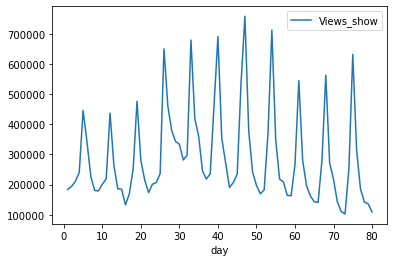

In [15]:
#day vs views graph
df.plot(x= 'day', y = 'Views_show')

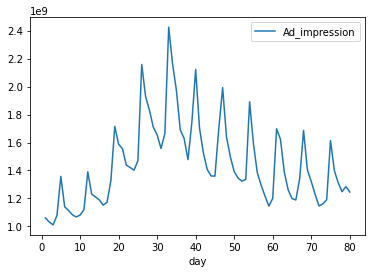

In [16]:
# days vs Ad_impression graph
df.plot(x= 'day', y = 'Ad_impression')

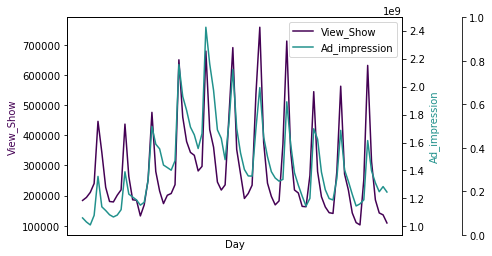

In [17]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(df.day,df.Views_show, color=color1,label="View_Show")
p2, = par1.plot(df.day,df.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

# Now we will OLS from stats module to get how different features are impacting the target, which can be usefull for marketing team.

#### Running 1st model

In [18]:
# Putting feature variable to X
X = df[['Visitors','day_of_week']]

# Putting response variable to y
y = df['Views_show']

In [22]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.44
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           3.98e-08
Time:                        17:37:43   Log-Likelihood:                -1051.4
No. Observations:                  80   AIC:                             2109.
Df Residuals:                      77   BIC:                             2116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.927e+05   1.05e+05     -2.778      

In [23]:
#setting a feature column for weekend 
li =[]
for i in (df.day_of_week):
    if (i == 5) or (i==6):
        li.append(1)
    else:
        li.append(0)
    

df['weekend'] = li

In [24]:
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week,day,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,1,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,2,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,3,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,4,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,5,1
...,...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0,76,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1,77,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2,78,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3,79,0


#### Running 2nd model

In [27]:
# Putting feature variable to X
X = df[['Visitors','weekend']]

# Putting response variable to y
y = df['Views_show']

In [28]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.51e-12
Time:                        17:39:47   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

#### Running 3rd model

In [29]:
# Putting feature variable to X
X = df[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = df['Views_show']

In [30]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.53e-14
Time:                        17:40:04   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [35]:
# Creating lag feature so see if previous day's views have an impact on next day's views
df['Lag_Views'] = np.roll(df['Views_show'], 1)
df.Lag_Views.replace(108961,0, inplace=True)

In [36]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week,day,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,1,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,2,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,3,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,4,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,5,1,240061


#### Running 4th model

In [38]:
# Putting feature variable to X
X = df[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = df['Views_show']

In [39]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           3.16e-21
Time:                        17:42:07   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

In [40]:
import seaborn as sns

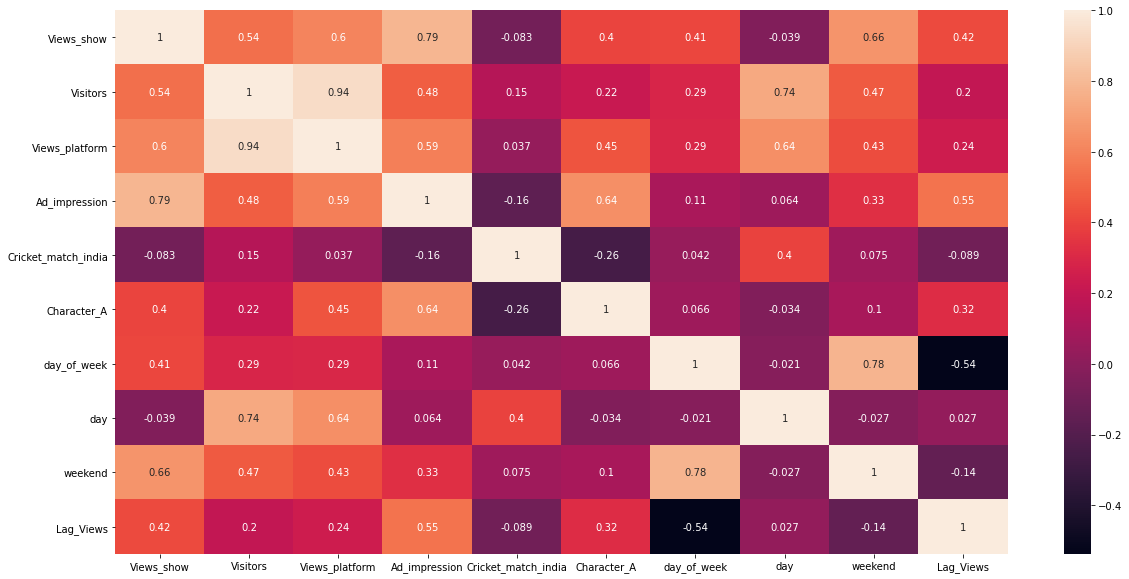

In [41]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

#### Running 5th model

In [43]:
# Putting feature variable to X
X = df[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = df['Views_show']

In [44]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           3.59e-15
Time:                        17:42:51   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

#### Running 6th model

In [45]:
# Putting feature variable to X
X = df[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = df['Views_show']

In [46]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.53e-14
Time:                        17:43:06   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

#### Running 7th model

In [48]:
# Putting feature variable to X
X = df[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = df['Views_show']

In [49]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.10e-25
Time:                        17:43:29   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

#### Running 8th model

In [51]:
# Putting feature variable to X
X = df[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = df['Views_show']

In [52]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.05e-26
Time:                        17:43:46   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [53]:
#Ad impression in million
df['ad_impression_million'] = df['Ad_impression']/1000000

#### Running 9th model

In [54]:
# Putting feature variable to X
X = df[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = df['Views_show']

In [55]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.02e-25
Time:                        17:46:26   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

#### Running 10th model

In [57]:
# Putting feature variable to X
X = df[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = df['Views_show']

In [58]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.05e-26
Time:                        17:46:42   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

#### Running 11th model

In [59]:
# Putting feature variable to X
X = df[['weekend','ad_impression_million']]

# Putting response variable to y
y = df['Views_show']

In [60]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_11 = sm.OLS(y,X).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.95e-27
Time:                        17:46:55   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

# Making predictions using the 10th model as it has the highest R-Squared value 

In [61]:

X = df[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(df.Views_show, Predicted_views)
r_squared = r2_score(df.Views_show, Predicted_views)

In [63]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4677651616.2534075
r_square_value : 0.802643446857565


Text(0, 0.5, 'Views')

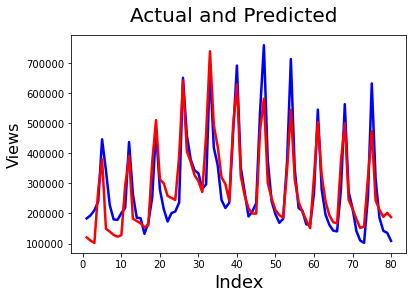

In [64]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               

Text(0, 0.5, 'Views_show-Predicted_views')

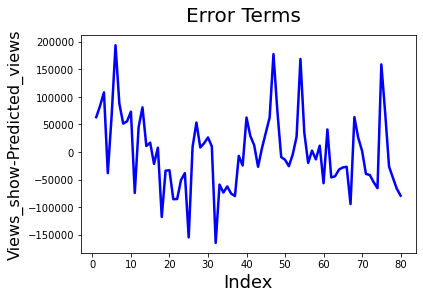

In [65]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

In [66]:
X = df[['weekend','Character_A','ad_impression_million']]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=1)

In [69]:
lm.fit(X_train,y_train)

LinearRegression()

In [70]:
print('Training accuracy=',lm.score(X_train,y_train)*100)

Training accuracy= 80.43739979505965


In [71]:
pred = lm.predict(X_test)

In [72]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100)

Prediction accuracy = 75.5365184613161


## Or we can simply run the Linear Regression model and check the coefficients and intercept values to make suggestions to marketing team

In [73]:
X = df.drop(['Views_show','Date'], axis =1)

In [74]:
y = df.Views_show

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=1)

In [76]:
lm.fit(X_train,y_train)

LinearRegression()

In [77]:
print('Training accuracy=',lm.score(X_train,y_train)*100)

Training accuracy= 88.60328961137743


In [78]:
pred = lm.predict(X_test)

In [79]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100)

Prediction accuracy = 85.42844897497429


In [80]:
lm.coef_

array([-4.34391283e-02,  1.58433778e-01,  2.26933421e-04,  1.77915105e+03,
       -4.37129796e+04,  1.82627840e+04, -1.82180746e+03,  8.29844294e+04,
        3.49561014e-01, -1.00478725e-08])

In [81]:
feature_names = X.columns.values
summary_table = pd.DataFrame(columns = ['Feature_names'], data = feature_names)
summary_table['coeff']= np.transpose(lm.coef_)
summary_table

summary_table.index = summary_table.index +1
summary_table.iloc[0]= ['Intercept', lm.intercept_]




summary_table.sort_index()

,Feature_names,coeff
1,Intercept,-4.050580e+05
2,Views_platform,1.584338e-01
3,Ad_impression,2.269334e-04
4,Cricket_match_india,1.779151e+03
5,Character_A,-4.371298e+04
6,day_of_week,1.826278e+04
7,day,-1.821807e+03
8,weekend,8.298443e+04
9,Lag_Views,3.495610e-01
10,ad_impression_million,-1.004787e-08


## Read the readme file for explanation of steps.